In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [218]:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [3]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Посмотрим общее описание данных. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Пропусков нет, категориальных значений нет.

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


Пока немного напрягают максимальные значения в сравнении с 3-им квантилем у CRIM, ZN.

Посмотрим распределения и выбросы.

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'CHAS'}>,
        <AxesSubplot:title={'center':'CRIM'}>],
       [<AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'RM'}>],
       [<AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'ZN'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

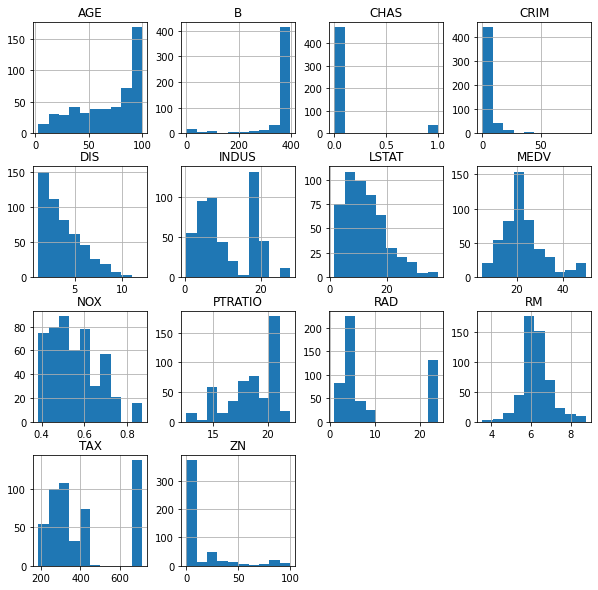

In [7]:
data.hist(figsize=(10,10))

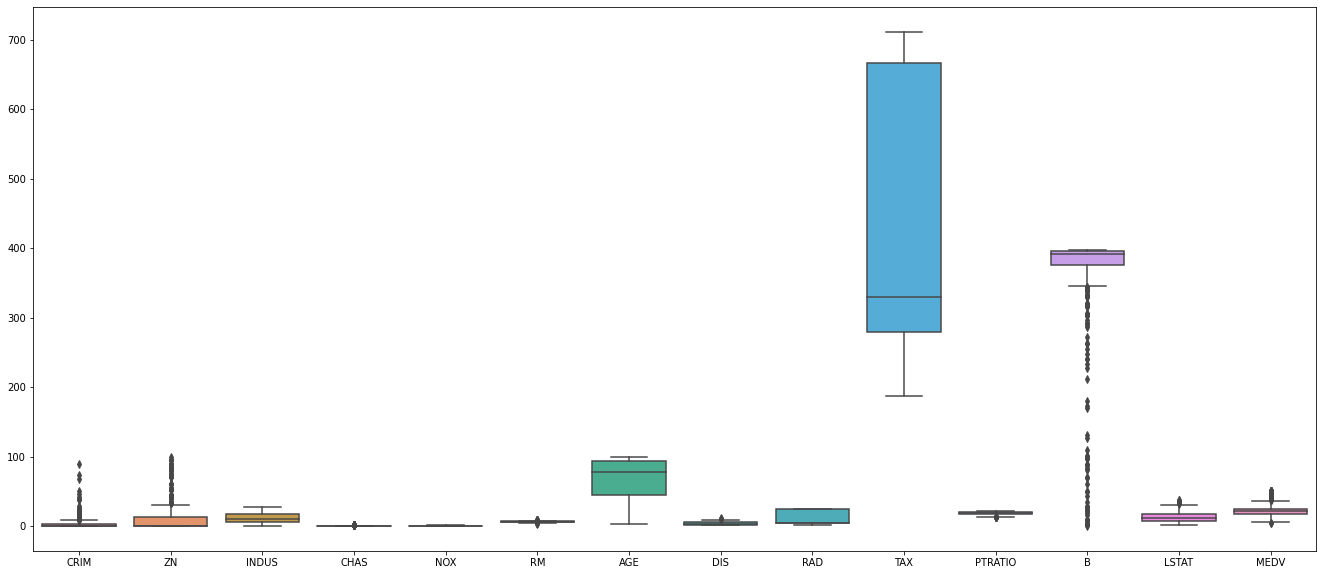

In [8]:
plt.rcParams['figure.figsize'] = (23, 10)
ax = sns.boxplot(data=data)

In [219]:
data.query('TAX > 500')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
356,8.98296,0.0,18.10,1,0.770,6.212,97.4,2.1222,24,666,20.2,377.73,17.60,17.8
357,3.84970,0.0,18.10,1,0.770,6.395,91.0,2.5052,24,666,20.2,391.34,13.27,21.7
358,5.20177,0.0,18.10,1,0.770,6.127,83.4,2.7227,24,666,20.2,395.43,11.48,22.7
359,4.26131,0.0,18.10,0,0.770,6.112,81.3,2.5091,24,666,20.2,390.74,12.67,22.6
360,4.54192,0.0,18.10,0,0.770,6.398,88.0,2.5182,24,666,20.2,374.56,7.79,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06,15.2
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0
490,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6


In [220]:
data = data.query('TAX < 500')

In [221]:
data.shape

(369, 14)

<AxesSubplot:>

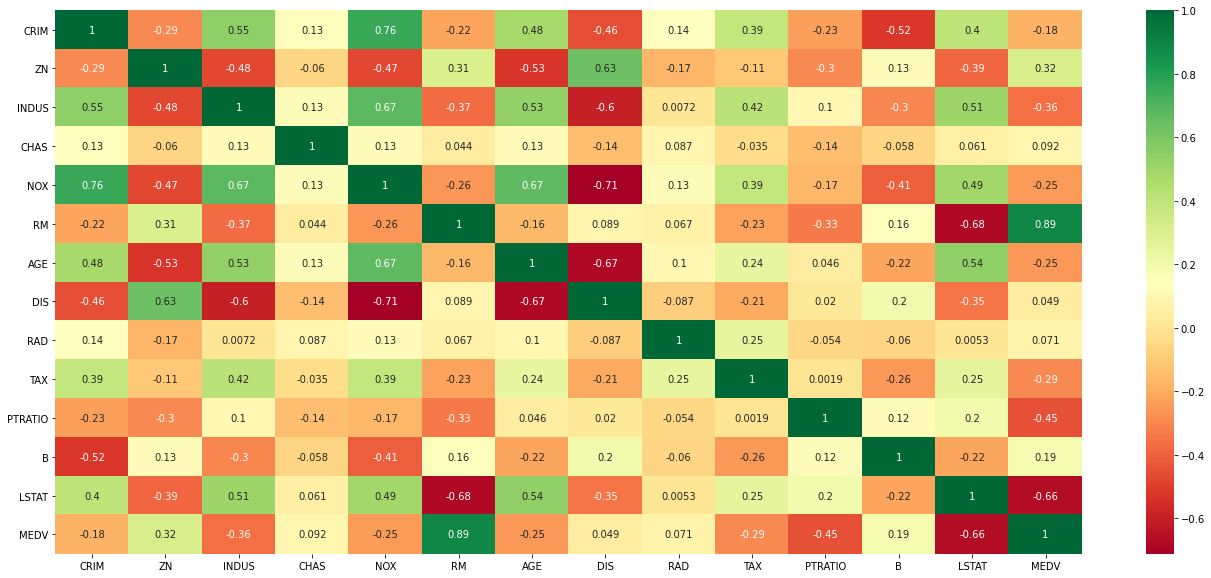

In [222]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True,cmap='RdYlGn')

Целевая переменная имеет сильную обратную корреляцию с долей населения с низким статусом, сильную прямую корреляцию со средним количеством комнат на одно жилое помещение.

In [223]:
data = data[['ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']]

Нормализуем данные.

In [224]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data_2 = pd.DataFrame(min_max_scaler.fit_transform(data))
data_2.columns = list(data.columns.values)

In [225]:
data_2.head()

,ZN,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,MEDV
0,0.18,0.073442,0.314815,0.437467,0.641607,0.386525,0.287234,0.099449,0.319372
1,0.00,0.262406,0.172840,0.397174,0.782698,0.195035,0.553191,0.226744,0.256545
2,0.00,0.262406,0.172840,0.597070,0.599382,0.195035,0.553191,0.070379,0.599476
3,0.00,0.068281,0.150206,0.548142,0.441813,0.124113,0.648936,0.037026,0.565445
4,0.00,0.068281,0.150206,0.587127,0.528321,0.124113,0.648936,0.110159,0.638743


In [247]:
X = data_2[['ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT']]
y = data_2.MEDV

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


R2 = r2_score(y_test, y_pred)
RMSE = sqrt(mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test, y_pred)

In [255]:
R2

0.8571941630869269

In [256]:
RMSE

0.0861900111148236

In [257]:
MAE

0.06875434491150434

Провела несколько итераций с чисткой данных.
Лучше всего получилось, когда чистила только по TAX. Попутно, видимо, ушли аномалии по другим признакам.

После этого по матрице корреляций подобрала признаки, которые наиболее сильно влияют на модель.

Итоговый коэффициент детерминации оказался довольно близким к единице.
Среднеквадратичная ошибка и средняя абсолютная ошибка также не очень большие.